# PyTorch Computer Vision

## 0. Computer vision libraries in PyTorch
* `torchvision` - base domain library for PyTorch
* `torchvision.datasets` - get datasets and data loading functions for computer vision
* `torchvision.models` - get pretrained computer vision models that you can leverage for your problems
* `torchvision.transforms` - function for manipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch.
* `torch.utils.data.Dataloader` - Creates a Python iterable over a dataset 

In [1]:
# Import PyTorch
import torch 
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor 

# Import matplotlib for vis..
import matplotlib.pyplot as plt

## Getting a dataset

The chosen dataset is fashionmnsit from torchvision.dataset

In [2]:
# Setup training data
trainData = datasets.FashionMNIST(
  root="data",# Where to download
  train=True, # Do we want the training data ?
  download=True, # Do you want to donwload ?
  transform=torchvision.transforms.ToTensor(), # how do we want to transform the data
  target_transform=None
)

testData = datasets.FashionMNIST(
  root="data",# Where to download
  train=False, # Do we want the training data ?
  download=True, # Do you want to donwload ?
  transform=torchvision.transforms.ToTensor(), # how do we want to transform the data
  target_transform=None
)

In [3]:
className = trainData.classes
className

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [4]:
trainData.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [5]:
trainData.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [6]:
image, label = trainData[0]

In [7]:
print(f"Image shape: {image.shape}  -> [color chanels, height, width]")
print(f"Image label: {className[label]}")

Image shape: torch.Size([1, 28, 28])  -> [color chanels, height, width]
Image label: Ankle boot


### Visualizing the data

Image shape: torch.Size([1, 28, 28])


(-0.5, 27.5, 27.5, -0.5)

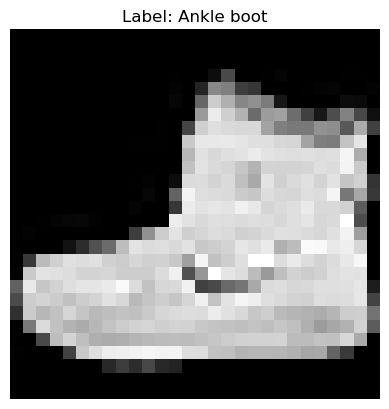

In [8]:
import matplotlib.pyplot as plt
image, label = trainData[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze(), cmap="gray")
plt.title(f"Label: {className[label]}")
plt.axis(False)

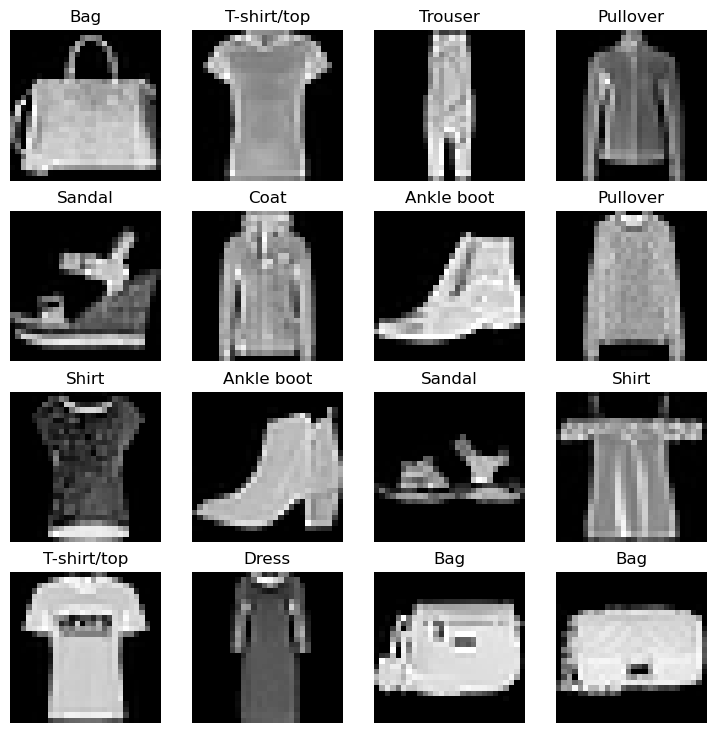

In [9]:
# Plot more images
# torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1,rows * cols+1):
  randIn = torch.randint(0,len(trainData),size=[1]).item()
  img, label = trainData[randIn]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap= "gray")
  plt.axis(False)
  plt.title(f"{className[label]}")

## 2. Prepare DataLoader

Right now, our data is in the form of PyTorch Datasets.

DataLoader turns our dataset into a Python iterable.

More specifically, we wanto to turn tha data into batches (or mini-batches)

Why would you do this ?

1. It's more computationally efficient, as in, your computing hardware may not bne able to look (store in memory) at 60 000 iamges in one hit. So we break it down to 32 images at a time(batch size 32).
2. It give our neural network more chances to update its gradient per epoch.

Do you think thease items of clothing (images) could be modeified with pure linear lines? Or do you think we'll need non-linear

In [10]:
from torch.utils.data import DataLoader
# Setup the batch size hyperparameter
BATCHSIZE = 32

# Turn datasets into iterables (batches)
TrainDataloader = DataLoader(dataset=trainData,
                             batch_size=BATCHSIZE,
                             shuffle=True)
TestDataloader = DataLoader(dataset=testData,
                             batch_size=BATCHSIZE,
                             shuffle=False)

TrainDataloader, TestDataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f5afabfb310>,
 <torch.utils.data.dataloader.DataLoader at 0x7f5afaac2890>)

In [11]:
# Let's check out what what we've created
print(f"DataLoaders: {TrainDataloader, TestDataloader}")
print(f"Lenght of the TrainDataloader: {len(TrainDataloader)}, Batches: {TrainDataloader.batch_size}")
print(f"Length of TestDataloader: {len(TestDataloader)}, Batches: {TestDataloader.batch_size}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f5afabfb310>, <torch.utils.data.dataloader.DataLoader object at 0x7f5afaac2890>)
Lenght of the TrainDataloader: 1875, Batches: 32
Length of TestDataloader: 313, Batches: 32


In [12]:
# Check out what's inside the training dataloader
trainFeaturesBatch, TrainLabelsBatch = next(iter(TrainDataloader))
trainFeaturesBatch.shape, TrainLabelsBatch.shape
# trainFeaturesBatch

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])


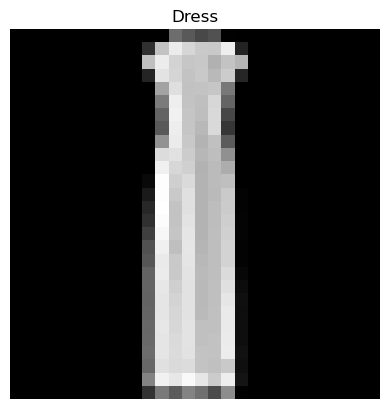

In [13]:
# Show a sample
# torch.manual_seed(42)
randomIn = torch.randint(0, len(trainFeaturesBatch), size = [1]).item()
img, label = trainFeaturesBatch[randomIn], TrainLabelsBatch[randomIn]
plt.imshow(img.squeeze(), cmap= "gray")
plt.title(className[label])
plt.axis(False)
print(f"Image size: {img.shape}")

## 3. Model 0: Build a baseline model

When starting to build a series of machine learning modeling experiments, it's best practice to start with a baseline model

A baseline model y a simnple model you will try and improve upon with subsequent models/experiments.

In otyher words: start simpl;y and add compexity when nesessary

In [14]:
# Creting a flatten layer
FlattenModel = nn.Flatten()

# Get a single sample
x = trainFeaturesBatch[0]

# Flatten the sample
output = FlattenModel(x)

#Print what happend
print(f"Old tensor's shape: {x.shape}\nNew tensor'shape {output.shape}")

output.squeeze()

Old tensor's shape: torch.Size([1, 28, 28])
New tensor'shape torch.Size([1, 784])


tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.0000,
        0.0000, 0.0000, 0.0000, 0.4510, 0.6157, 0.5922, 0.6196, 0.4667, 0.0000,
        0.0000, 0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000,
        0.0000, 0.0000, 0.1451, 0.5333, 0.8118, 0.8941, 0.9765, 0.8745, 0.8078,
        0.5373, 0.1490, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.0000,
        0.0078, 0.5529, 0.6941, 0.7922, 0.7804, 0.7176, 0.7020, 0.6980, 0.7059,
        0.7098, 0.7843, 0.8000, 0.6980, 0.4902, 0.0078, 0.0000, 0.0078, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.6980, 0.8157, 0.7529, 0.7294, 0.7216, 0.7255, 0.7333, 0.7373,
        0.7333, 0.7294, 0.7216, 0.7294, 0.7490, 0.8157, 0.6980, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

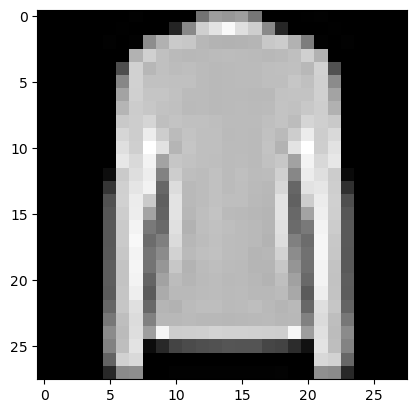

In [15]:
plt.imshow(trainFeaturesBatch[0].squeeze(), cmap= "gray")

In [16]:
from torch import nn

class fashionMNISTModelV0(nn.Module):
  def __init__(self,
               inputShape: int,
               hiddenUnits: int,
               outputShape: int,
               ) -> None:
    super().__init__()
    self.LayerStack = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=inputShape,
                out_features=hiddenUnits),
      nn.Linear(in_features=hiddenUnits,
                out_features=outputShape)
    )

  def forward(self, x):
    return self.LayerStack(x)


In [17]:
# Setup a model wihtinput parameters

model0 = fashionMNISTModelV0(inputShape=784, # 28 * 28
                             hiddenUnits=10, # How many units in the hidden layer
                             outputShape=len(className)
          ).to("cpu")
model0

fashionMNISTModelV0(
  (LayerStack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [18]:
dummyX = torch.rand([1,1,28,28])
dummyX
model0(dummyX)

tensor([[ 0.0643, -0.1677,  0.1524, -0.0759,  0.0189, -0.2292, -0.3222, -0.0394,
          0.0549,  0.1170]], grad_fn=<AddmmBackward0>)

### Setup a loss, optimizer and evaluation metrics

* Loss function - since we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD()` (stochastic gradien decent)
* Evaluation metrics - since we're working on a classification, let's use accuracy as our evaluator metric

In [19]:
from helper_functions import *

# Setup a loss function and optimizer
lossFn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model0.parameters(),
                            lr=0.1)

### 3.2 Createing a function to time our experiments

machine learning is very experimental.

Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy values etc)
2. How fast it runs

In [20]:
from timeit import default_timer as timer
def printTrainTime(start: float,
                   end: float,
                   device: torch.device = None):
  """Prints difference between start and end time."""
  totalTime = end - start
  print(f"Train time on {device}: {totalTime:.3f} seconds")
  return totalTime

In [21]:
startTime = timer()
# Some code
endTime = timer()
printTrainTime(startTime,endTime, "cpu")

Train time on cpu: 0.000 seconds


2.084600009766291e-05

### Creating a traaining loop and training a model on batches of data

1. Loop thought epochs.
2. Loop thought training batches, perform training steps, calculate the train loss *Per batch*.
3. Loop thought testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out what's happening.
5. Time it all (for fun).

In [22]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
trainTimeStart = timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Create training and test loop

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  ### Training
  trainLoss = 0
  # Add a loop to loop thought the training batches
  for batch, (X, y) in enumerate(TrainDataloader):
    model0.train()
    # 1. Forward pass
    yPred = model0(X)

    # 2. Calculate the loss (per batch)
    loss = lossFn(yPred, y)
    trainLoss += loss # Accumulate train loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Print out whats happening
    if batch % 100 == 0:
      print(f"Looked at {batch * len(X)}/{len(TrainDataloader.dataset)} samples.")

  # Divide total train loss by lenght of training dataloader
  trainLoss /= len(TrainDataloader)

  ### Testing
  testLoss, testAcc = 0,0
  model0.eval()
  with torch.inference_mode():
    for XTest, yTest in TestDataloader:
      # 1. Foward Pass
      TestPred = model0(XTest)

      # 2. Calculate the loss (accumulatively)
      testLoss += lossFn(TestPred, yTest)

      # 3. Calcualte accuracy
      testAcc += accuracy_fn(yTest,TestPred.argmax(dim=1))

    # Calculate test loss
    testLoss /= len(TestDataloader)

    # Calculate the test acc average per batch
    testAcc /= len(TestDataloader)

  # Print out what's happening
  print(f"\n Train loss {trainLoss:.4f} | Test loss {testLoss:.4f}, Test Acc: {testAcc:.4f}")

# Calculate the train time
trainTimeEnd = timer()
totalTrainTimeModel0 = printTrainTime(start=trainTimeStart,
                                      end=trainTimeEnd,
                                      device=str(next(model0.parameters()).device))

/usr/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/60000 samples.
Looked at 3200/60000 samples.
Looked at 6400/60000 samples.
Looked at 9600/60000 samples.
Looked at 12800/60000 samples.
Looked at 16000/60000 samples.
Looked at 19200/60000 samples.
Looked at 22400/60000 samples.
Looked at 25600/60000 samples.
Looked at 28800/60000 samples.
Looked at 32000/60000 samples.
Looked at 35200/60000 samples.
Looked at 38400/60000 samples.
Looked at 41600/60000 samples.
Looked at 44800/60000 samples.
Looked at 48000/60000 samples.
Looked at 51200/60000 samples.
Looked at 54400/60000 samples.
Looked at 57600/60000 samples.


 33%|███▎      | 1/3 [00:04<00:08,  4.14s/it]


 Train loss 0.5889 | Test loss 0.5095, Test Acc: 82.1386
Epoch: 1
-----
Looked at 0/60000 samples.
Looked at 3200/60000 samples.
Looked at 6400/60000 samples.
Looked at 9600/60000 samples.
Looked at 12800/60000 samples.
Looked at 16000/60000 samples.
Looked at 19200/60000 samples.
Looked at 22400/60000 samples.
Looked at 25600/60000 samples.
Looked at 28800/60000 samples.
Looked at 32000/60000 samples.
Looked at 35200/60000 samples.
Looked at 38400/60000 samples.
Looked at 41600/60000 samples.
Looked at 44800/60000 samples.
Looked at 48000/60000 samples.
Looked at 51200/60000 samples.
Looked at 54400/60000 samples.
Looked at 57600/60000 samples.


 67%|██████▋   | 2/3 [00:08<00:04,  4.12s/it]


 Train loss 0.4757 | Test loss 0.4837, Test Acc: 82.8974
Epoch: 2
-----
Looked at 0/60000 samples.
Looked at 3200/60000 samples.
Looked at 6400/60000 samples.
Looked at 9600/60000 samples.
Looked at 12800/60000 samples.
Looked at 16000/60000 samples.
Looked at 19200/60000 samples.
Looked at 22400/60000 samples.
Looked at 25600/60000 samples.
Looked at 28800/60000 samples.
Looked at 32000/60000 samples.
Looked at 35200/60000 samples.
Looked at 38400/60000 samples.
Looked at 41600/60000 samples.
Looked at 44800/60000 samples.
Looked at 48000/60000 samples.
Looked at 51200/60000 samples.
Looked at 54400/60000 samples.
Looked at 57600/60000 samples.


100%|██████████| 3/3 [00:12<00:00,  4.18s/it]


 Train loss 0.4546 | Test loss 0.4777, Test Acc: 83.3766
Train time on cpu: 12.540 seconds


## 4. Make Predictions and aget Model0 Results

In [23]:
def evalModel(model: torch.nn.Module,
              dataLoader: torch.utils.data.DataLoader,
              lossFN: torch.nn.Module,
              accuracyFN):
  """Returns a dictionary containing the result of model predicting on dataLoader."""
  loss, acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(dataLoader):
      # Make predictions
      yPred = model(X)

      # Accumulatethe loss and acc values per batch
      loss += lossFN(yPred, y)
      acc += accuracyFN(y_true=y,
                         y_pred=yPred.argmax(dim=1))
      
      # Scale loss and acc to find the average loss/acc per batch
    loss /= len(dataLoader)
    acc /= len(dataLoader)

  return{"Model Name": model.__class__.__name__, # Only works when model was created with a class
         "Model Loss": loss.item(),
         "Model Acc": acc}

# Calculate model 0 results on text data

Model0Results = evalModel(model=model0,
                          dataLoader=TestDataloader,
                          lossFN=lossFn,
                          accuracyFN=accuracy_fn)

Model0Results

100%|██████████| 313/313 [00:00<00:00, 632.67it/s]


{'Model Name': 'fashionMNISTModelV0',
 'Model Loss': 0.4776636064052582,
 'Model Acc': 83.37659744408946}

## 6. Model 1: Building a better model wuth non-linearity

We learned the power of non-linearity

In [24]:
# Create a model with non-linearity

class fashionMNISTModelV1(nn.Module):
  def __init__(self,
               inputShape: int,
               hiddenUnits: int,
               outputShape: int,
               ) -> None:
    super().__init__()
    self.LayerStack = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=inputShape,
                out_features=hiddenUnits),
      nn.ReLU(),
      nn.Linear(in_features=hiddenUnits,
                out_features=outputShape),
      nn.ReLU()
    )

  def forward(self, x):
    return self.LayerStack(x)


In [25]:
# Create an instance of model1
model1 = fashionMNISTModelV1(inputShape=784,
                             hiddenUnits=10,
                             outputShape=len(className))

## 6.1 Setup los optimizer and evaluation metrics

In [42]:
from helper_functions import *

# Setup a loss function and optimizer
LossFN = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model1.parameters(),
                            lr=0.1)

### 6.2 Functionizing training and evaluation/testing loops

Let's create a function for:
* Training loop - `trainStep()`
* Testing loop - `testStep()`

In [43]:
device = "gpu" if torch.cuda.is_available() else "cpu"
print(device)

cpu


In [44]:
def TrainStep(model: torch.nn.Module,
               dataLoader: torch.utils.data.DataLoader,
               LossFN: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracyFN,
               device: torch.device = device):
  """Performs a training with model trying to learn on data_loader."""
  train_loss, train_acc = 0, 0

  # Put model into training mode
  model.train()

  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(dataLoader):
    # Put data on target device 
    X, y = X.to(device), y.to(device)

    # 1. Forward pass (outputs the raw logits from the model)
    y_pred = model(X)
    
    # 2. Calculate loss and accuracy (per batch)
    loss = LossFN(y_pred, y)
    train_loss += loss # accumulate train loss
    train_acc += accuracyFN(y_true=y,
                             y_pred=y_pred.argmax(dim=1)) # go from logits -> prediction labels
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Loss backward
    loss.backward()
    
    # 5. Optimizer step (update the model's parameters once *per batch*)
    optimizer.step()
  
  # Divide total train loss and acc by length of train dataloader
  train_loss /= len(dataLoader)
  train_acc /= len(dataLoader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [45]:
def TestStep(model: torch.nn.Module,
              dataLoader: torch.utils.data.DataLoader, 
              lossFN: torch.nn.Module,
              accuracyFN,
              device: torch.device = device):
  """Performs a testing loop step on model going over data_loader."""
  test_loss, test_acc = 0, 0
  
  # Put the model in eval mode
  model.eval()

  # Turn on inference mode context manager
  with torch.inference_mode():
    for X, y in dataLoader:
      # Send the data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass (outputs raw logits)
      test_pred = model(X)

      # 2. Calculuate the loss/acc
      test_loss += lossFN(test_pred, y)
      test_acc += accuracyFN(y_true=y,
                              y_pred=test_pred.argmax(dim=1)) # go from logits -> prediction labels 

    # Adjust metrics and print out
    test_loss /= len(dataLoader)
    test_acc /= len(dataLoader)
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")
     

In [46]:
# Set epochs
epochs = 5

# Create a optimization and evaluation loop using trainStep() and testStep()
for epoch in tqdm(range(epochs)):
  print(f"-------- Epoch: {epoch} --------")
  TrainStep(model=model1,
            dataLoader=TrainDataloader,
            LossFN=lossFn,
            optimizer=optimizer,
            accuracyFN=accuracy_fn,
            device=device)
  TestStep(model=model1,
           dataLoader=TestDataloader,
           lossFN=lossFn,
           accuracyFN=accuracy_fn,
           device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

-------- Epoch: 0 --------
Train loss: 1.34759 | Train acc: 57.28%


 20%|██        | 1/5 [00:04<00:18,  4.56s/it]

Test loss: 1.19050 | Test acc: 62.86%

-------- Epoch: 1 --------
Train loss: 1.12506 | Train acc: 65.23%


 40%|████      | 2/5 [00:09<00:14,  4.69s/it]

Test loss: 1.15321 | Test acc: 64.30%

-------- Epoch: 2 --------
Train loss: 1.09576 | Train acc: 66.22%


 60%|██████    | 3/5 [00:13<00:09,  4.54s/it]

Test loss: 1.09779 | Test acc: 65.31%

-------- Epoch: 3 --------
Train loss: 1.08154 | Train acc: 66.61%


 80%|████████  | 4/5 [00:18<00:04,  4.52s/it]

Test loss: 1.09689 | Test acc: 66.28%

-------- Epoch: 4 --------
Train loss: 1.07330 | Train acc: 67.01%


100%|██████████| 5/5 [00:22<00:00,  4.50s/it]

Test loss: 1.09778 | Test acc: 66.59%

